## A Ciência de Dados como bússola da prevenção aeronáutica

Técnologias Utilizadas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import locale
from wordcloud import WordCloud

## ETAPA 1 - ETL -> EXTRAÇÃO DOS DADOS VIA WEB

Download do dataset diretamente do site

In [20]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("liamarguedas/brazil-total-aeronautical-occurrences-2010-2021")

print("Path to dataset files:", path)

c:\Users\gahco\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 991k/991k [00:00<00:00, 1.70MB/s]

Extracting files...
Path to dataset files: C:\Users\gahco\.cache\kagglehub\datasets\liamarguedas\brazil-total-aeronautical-occurrences-2010-2021\versions\1


## ABRINDO OS ARQUIVOS CSV

In [3]:
import os

caminho_1 = r'C:/Users/gahco/.cache/kagglehub/datasets/liamarguedas/brazil-total-aeronautical-occurrences-2010-2021/versions/1/Brazil Total Aeronautical Occurrences 2010 - 2021.csv'


df = pd.read_csv(caminho_1)

df.head(10)

,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,...,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_nome,fator_aspecto,fator_condicionante,fator_area
0,INCIDENTE GRAVE,-9.868333333333,-67.89805555555,RIO BRANCO,AC,BRASIL,SBRB,14/04/2022,17:45:00,SIM,...,SANTA ROSA DO PURUS,PLÁCIDO DE CASTRO,APROXIMAÇÃO FINAL,TÁXI AÉREO,NENHUM,0,SUPERVISÃO GERENCIAL,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
1,ACIDENTE,-12.20416666666,-56.23777777777,IPIRANGA DO NORTE,MT,BRASIL,Fora de aerodromo,24/03/2022,19:30:00,SIM,...,FORA DE AERODROMO,FORA DE AERODROMO,MANOBRA,AGRÍCOLA,SUBSTANCIAL,0,ATENÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
2,ACIDENTE,-12.20416666666,-56.23777777777,IPIRANGA DO NORTE,MT,BRASIL,Fora de aerodromo,24/03/2022,19:30:00,SIM,...,FORA DE AERODROMO,FORA DE AERODROMO,MANOBRA,AGRÍCOLA,SUBSTANCIAL,0,ATITUDE,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
3,ACIDENTE,-12.20416666666,-56.23777777777,IPIRANGA DO NORTE,MT,BRASIL,Fora de aerodromo,24/03/2022,19:30:00,SIM,...,FORA DE AERODROMO,FORA DE AERODROMO,MANOBRA,AGRÍCOLA,SUBSTANCIAL,0,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
4,ACIDENTE,-12.20416666666,-56.23777777777,IPIRANGA DO NORTE,MT,BRASIL,Fora de aerodromo,24/03/2022,19:30:00,SIM,...,FORA DE AERODROMO,FORA DE AERODROMO,MANOBRA,AGRÍCOLA,SUBSTANCIAL,0,PERCEPÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
5,ACIDENTE,-12.20416666666,-56.23777777777,IPIRANGA DO NORTE,MT,BRASIL,Fora de aerodromo,24/03/2022,19:30:00,SIM,...,FORA DE AERODROMO,FORA DE AERODROMO,MANOBRA,AGRÍCOLA,SUBSTANCIAL,0,PLANEJAMENTO DE VOO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
6,ACIDENTE,-12.20416666666,-56.23777777777,IPIRANGA DO NORTE,MT,BRASIL,Fora de aerodromo,24/03/2022,19:30:00,SIM,...,FORA DE AERODROMO,FORA DE AERODROMO,MANOBRA,AGRÍCOLA,SUBSTANCIAL,0,POUCA EXPERIÊNCIA DO PILOTO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
7,ACIDENTE,-12.20416666666,-56.23777777777,IPIRANGA DO NORTE,MT,BRASIL,Fora de aerodromo,24/03/2022,19:30:00,SIM,...,FORA DE AERODROMO,FORA DE AERODROMO,MANOBRA,AGRÍCOLA,SUBSTANCIAL,0,PROCESSO DECISÓRIO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
8,ACIDENTE,-12.20416666666,-56.23777777777,IPIRANGA DO NORTE,MT,BRASIL,Fora de aerodromo,24/03/2022,19:30:00,SIM,...,FORA DE AERODROMO,FORA DE AERODROMO,MANOBRA,AGRÍCOLA,SUBSTANCIAL,0,SUPERVISÃO GERENCIAL,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
9,ACIDENTE,-19.19833333333,-45.01166666666,POMPÉU,MG,BRASIL,SNPO,13/03/2022,15:00:00,SIM,...,TENENTE XAVIER,TENENTE XAVIER,DECOLAGEM,AGRÍCOLA,SUBSTANCIAL,0,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL


Validando o total de linhas e o nome de todas as colunas

In [4]:
print("Total de linhas:\n", len(df))
print("\nNome das colunas:\n", df.columns.tolist())

Total de linhas:
 7567

Nome das colunas:
 ['ocorrencia_classificacao', 'ocorrencia_latitude', 'ocorrencia_longitude', 'ocorrencia_cidade', 'ocorrencia_uf', 'ocorrencia_pais', 'ocorrencia_aerodromo', 'ocorrencia_dia', 'ocorrencia_hora', 'investigacao_aeronave_liberada', 'investigacao_status', 'divulgacao_relatorio_numero', 'divulgacao_relatorio_publicado', 'divulgacao_dia_publicacao', 'total_recomendacoes', 'total_aeronaves_envolvidas', 'ocorrencia_saida_pista', 'ocorrencia_tipo', 'ocorrencia_tipo_categoria', 'taxonomia_tipo_icao', 'recomendacao_numero', 'recomendacao_dia_assinatura', 'recomendacao_dia_encaminhamento', 'recomendacao_dia_feedback', 'recomendacao_conteudo', 'recomendacao_status', 'recomendacao_destinatario_sigla', 'recomendacao_destinatario', 'aeronave_matricula', 'aeronave_tipo_veiculo', 'aeronave_fabricante', 'aeronave_modelo', 'aeronave_tipo_icao', 'aeronave_motor_tipo', 'aeronave_motor_quantidade', 'aeronave_pmd', 'aeronave_pmd_categoria', 'aeronave_assentos', 'aeron

## 📊 Analise temporal

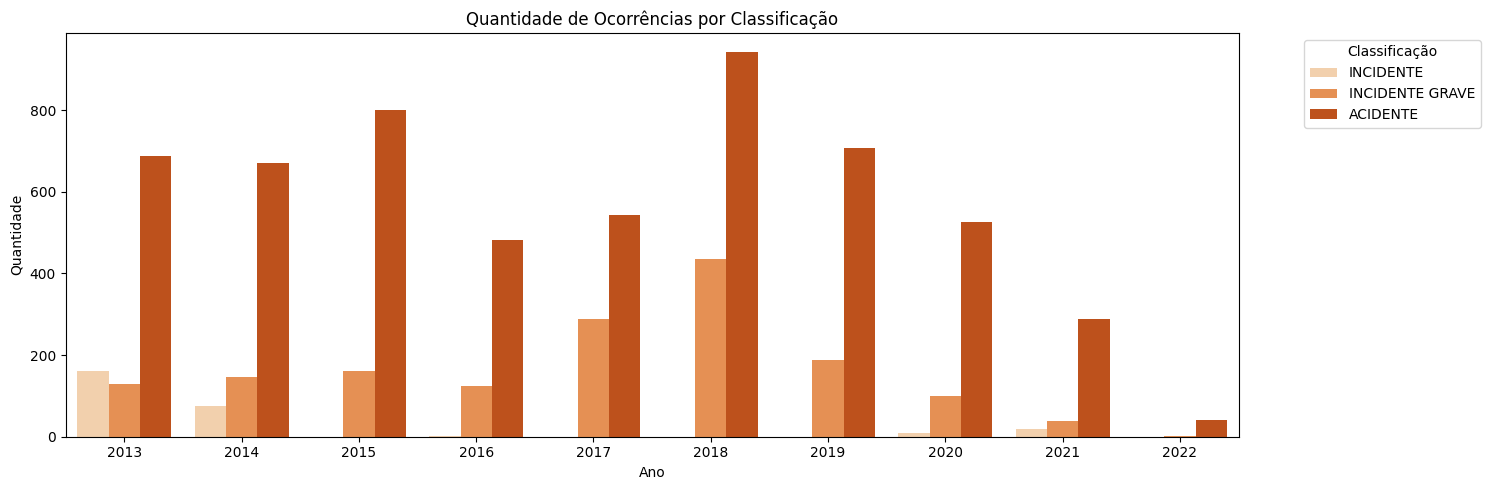

In [ ]:
# Quantidade de ocorrências por classificação

# Conta a quantidade de ocorrências por classificação
counts = df['ocorrencia_classificacao'].value_counts()

df['ano'] = pd.to_datetime(df['ocorrencia_dia'], dayfirst=True).dt.year

# Gráfico 1: Ocorrências por classificação e ano
counts_ano = df.groupby(['ano', 'ocorrencia_classificacao']).size().unstack(fill_value=0)

plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='ano', hue='ocorrencia_classificacao', palette='Oranges')

plt.title('Quantidade de Ocorrências por Classificação')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.legend(title='Classificação', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


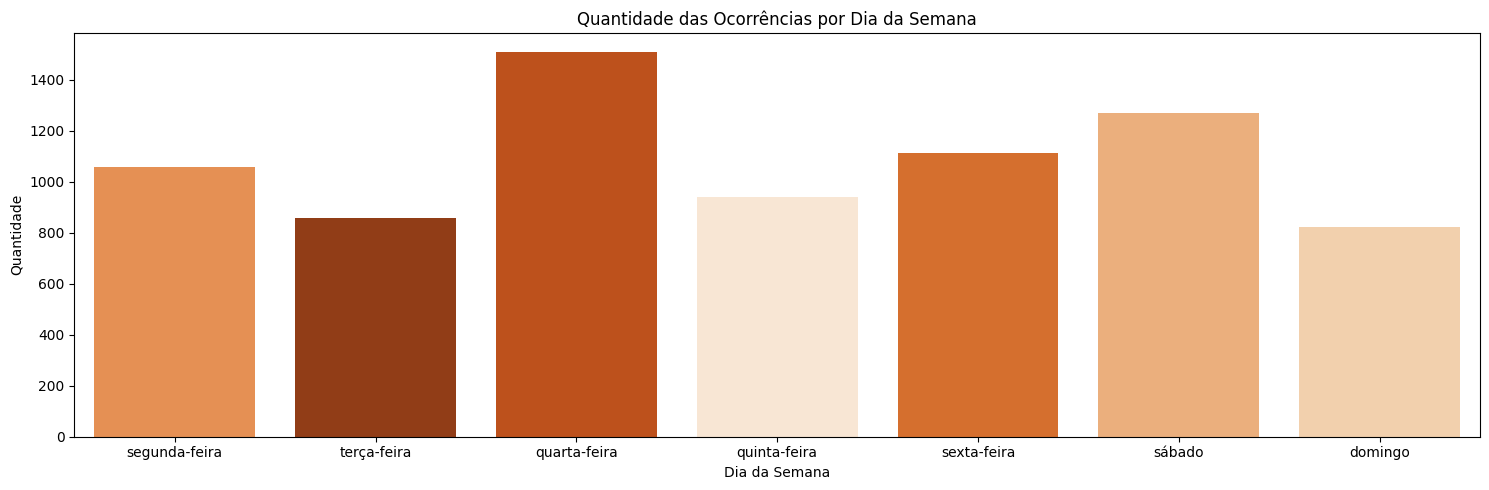

In [144]:
# Quantidade das ocorrências por dia da semana

# Configurar o locale para português (ajuste conforme seu sistema operacional)
locale.setlocale(locale.LC_TIME, 'Portuguese_Brazil.1252')

# Converter colunas de data e hora
df['ocorrencia_dia'] = pd.to_datetime(df['ocorrencia_dia'], format='%d/%m/%Y', errors='coerce')
df['ocorrencia_hora'] = pd.to_datetime(df['ocorrencia_hora'], format='%H:%M:%S', errors='coerce').dt.time

# Extrair o dia da semana (em português) e a hora formatada
df['dia_semana'] = df['ocorrencia_dia'].dt.strftime('%A')
df['hora'] = df['ocorrencia_hora'].apply(lambda x: x.strftime('%H:%M') if pd.notnull(x) else None)

ordem_semana = ['segunda-feira', 'terça-feira', 'quarta-feira', 'quinta-feira',
           'sexta-feira', 'sábado', 'domingo']
# Gráfico: Ocorrências por dia da semana
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='dia_semana', hue='dia_semana', order=ordem_semana, palette='Oranges')

plt.title('Quantidade das Ocorrências por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


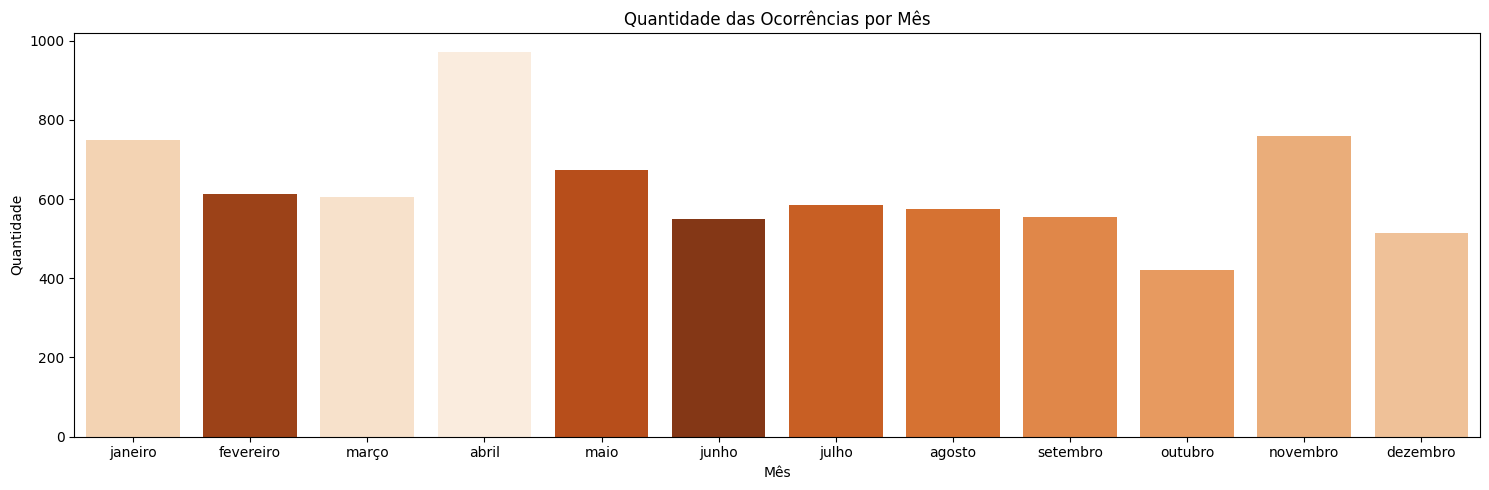

In [143]:
# Quantidade das Ocorrências por Mês

# Definindo o idioma para português (ajuste conforme seu sistema)
locale.setlocale(locale.LC_TIME, 'Portuguese_Brazil.1252')

# Criando a coluna com o nome do mês em português
df['mes'] = df['ocorrencia_dia'].dt.strftime('%B')

# Ordem correta dos meses em português
ordem_meses = ['janeiro', 'fevereiro', 'março', 'abril', 'maio', 'junho',
               'julho', 'agosto', 'setembro', 'outubro', 'novembro', 'dezembro']

# Gráfico
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='mes', hue='mes', order=ordem_meses, palette='Oranges')

plt.title('Quantidade das Ocorrências por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


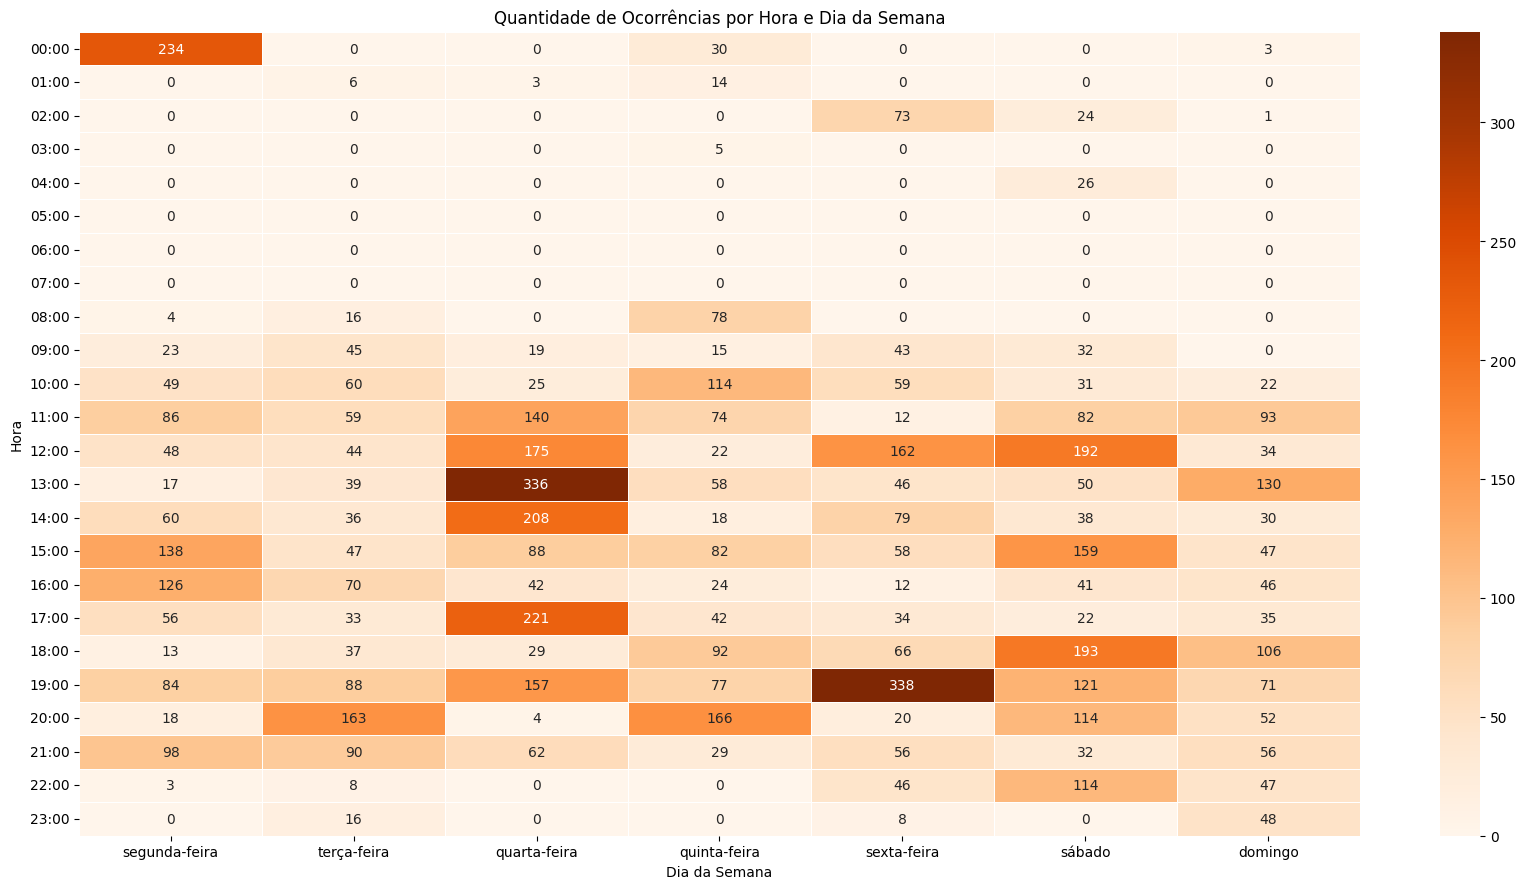

In [142]:
# Quantidade de ocorrências por hora e dia da semana

df['hora_cheia'] = df['ocorrencia_hora'].apply(lambda x: x.strftime('%H:00') if pd.notnull(x) else None)

ordem_dias = ['segunda-feira', 'terça-feira', 'quarta-feira', 'quinta-feira',
             'sexta-feira', 'sábado', 'domingo']

ordem_horas = [f'{h:02d}:00' for h in range(24)]

tabela = df.pivot_table(index='hora_cheia', columns='dia_semana', aggfunc='size', fill_value=0)
tabela = tabela.reindex(columns=ordem_dias)
tabela = tabela.reindex(index=ordem_horas)
tabela = tabela.fillna(0)  # preencher NaN com 0
tabela = tabela.astype(int)  # converter para inteiro

# Gráfico de calor
plt.figure(figsize=(17, 9))
sns.heatmap(tabela, cmap='Oranges', annot=True, fmt='d', linewidths=.5)

plt.title('Quantidade de Ocorrências por Hora e Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Hora')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### 🌎 Análise Geográfica

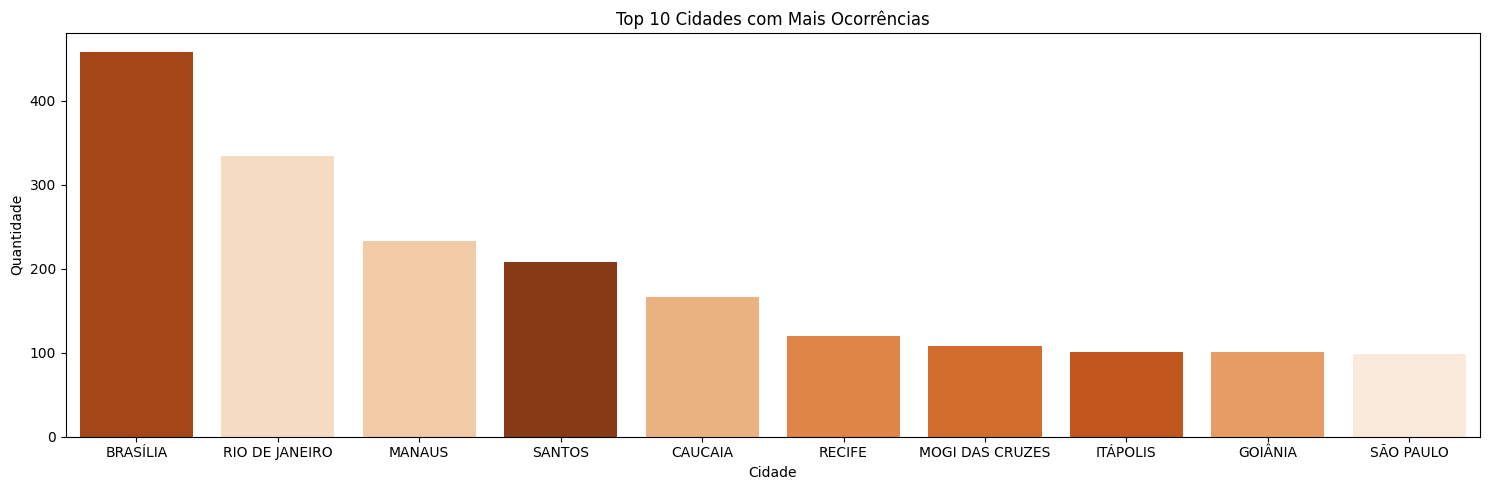

In [141]:
# TOP 10 cidade com mais Ocorrências

plt.figure(figsize=(15, 5))

top_cidades = df['ocorrencia_cidade'].value_counts().nlargest(10).index

# Gráfico de barras
sns.countplot(
    data=df[df['ocorrencia_cidade'].isin(top_cidades)],
    x='ocorrencia_cidade',
    hue='ocorrencia_cidade',
    order=top_cidades,
    palette='Oranges',
    legend=False
)

plt.title('Top 10 Cidades com Mais Ocorrências')
plt.xlabel('Cidade')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

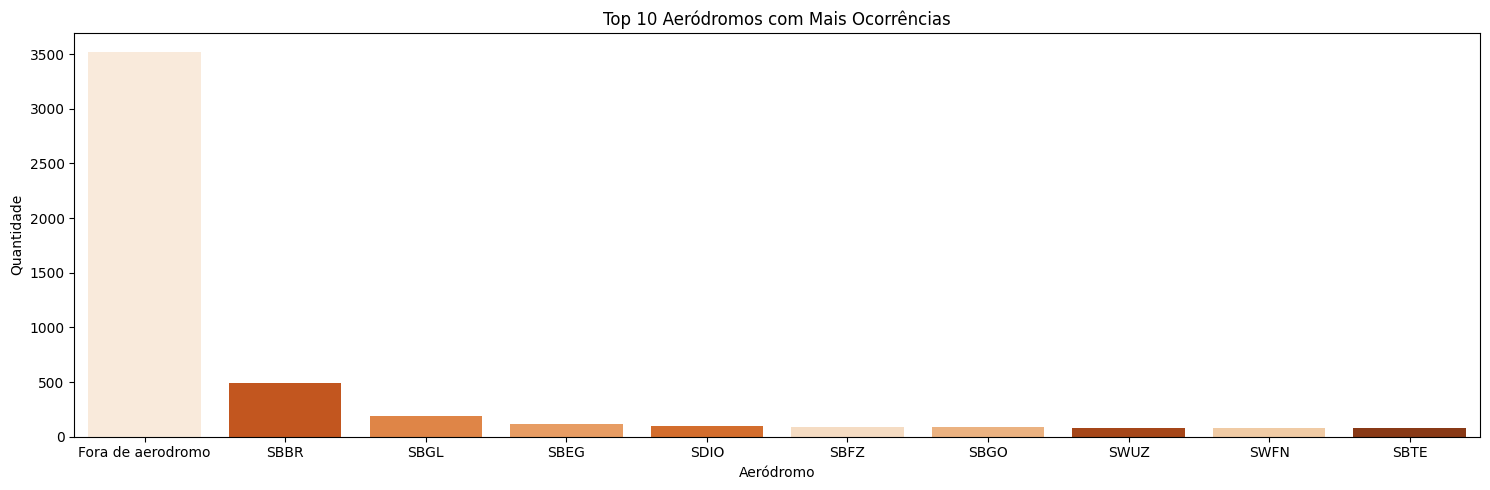

In [9]:
# TOP 10 Aeródromos com mais ocorrências

plt.figure(figsize=(15, 5))
top_aerodromos = df['ocorrencia_aerodromo'].value_counts().nlargest(10).index

# Gráfico de barras
sns.countplot(
    data=df[df['ocorrencia_aerodromo'].isin(top_aerodromos)],
    x='ocorrencia_aerodromo',
    hue='ocorrencia_aerodromo',
    order=top_aerodromos,
    palette='Oranges',
    legend=False
)

plt.title('Top 10 Aeródromos com Mais Ocorrências')
plt.xlabel('Aeródromo')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

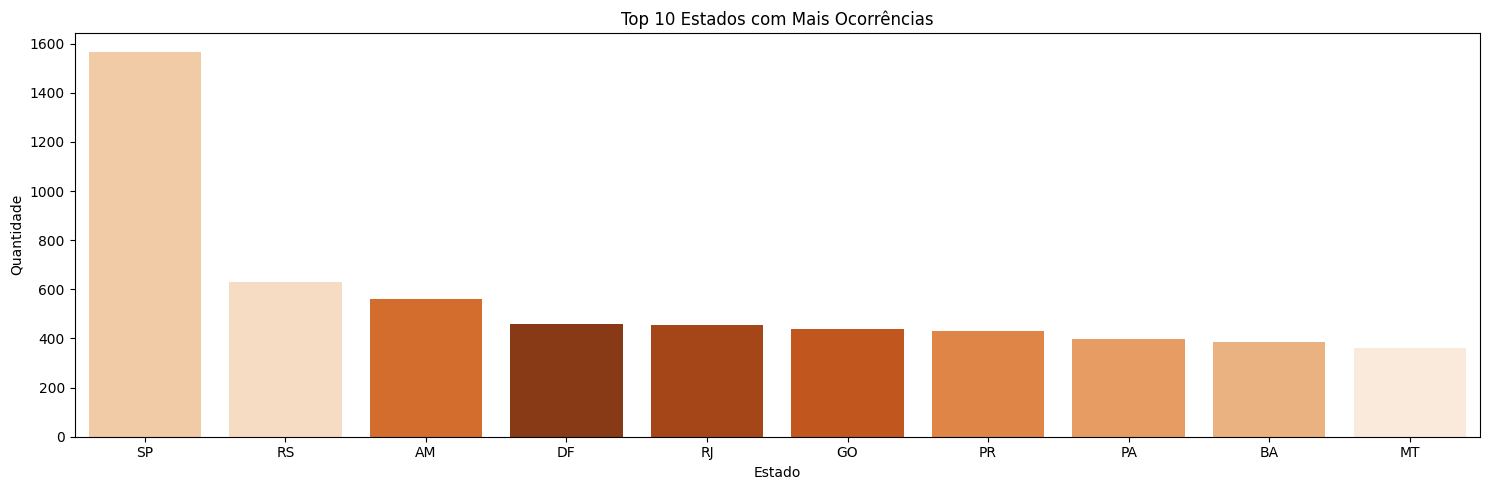

In [10]:
# TOP10 estado com mais Ocorrências

plt.figure(figsize=(15, 5))

top_estados = df['ocorrencia_uf'].value_counts().nlargest(10).index

# Gráfico de barras
sns.countplot(
    data=df[df['ocorrencia_uf'].isin(top_estados)],
    x='ocorrencia_uf',
    hue='ocorrencia_uf',
    order=top_estados,
    palette='Oranges',
    legend=False
)

plt.title('Top 10 Estados com Mais Ocorrências')
plt.xlabel('Estado')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

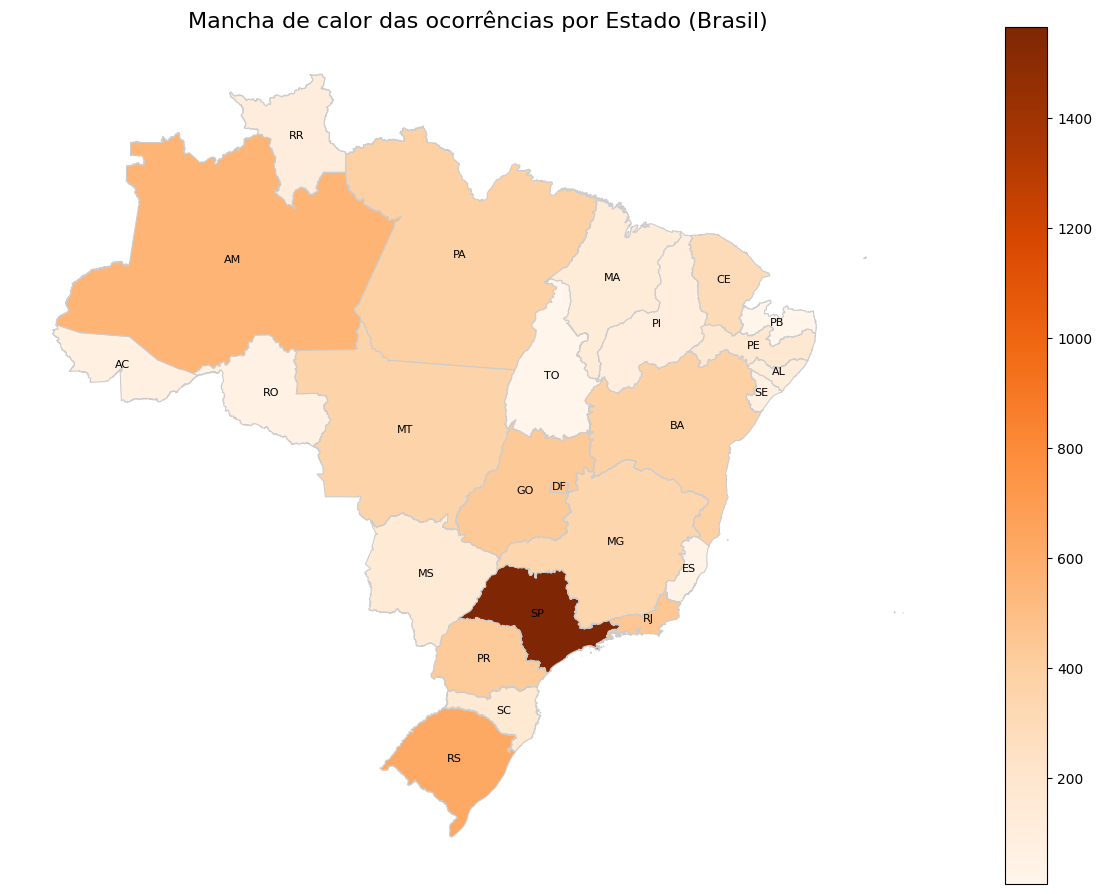

In [14]:
import geopandas as gpd

# Estados do Brasil com shapefile

# Caminho para o shapefile (use 'r' para evitar problemas com barras invertidas)
caminho_shapefile = r'C:\Users\gahco\OneDrive\Documentos\BR_UF_2024\BR_UF_2024.shp'

# 1. Carregar o shapefile dos estados
estados = gpd.read_file(caminho_shapefile)

# 2. Agrupar os acidentes por estado (coluna: 'ocorrencia_uf')
acidentes_por_estado = df['ocorrencia_uf'].value_counts().reset_index()
acidentes_por_estado.columns = ['uf', 'num_acidentes']

# 3. Mesclar os dados do shapefile com os dados de acidentes
# Verifique se a coluna correta é mesmo 'SIGLA_UF'
mapa = estados.merge(acidentes_por_estado, left_on='SIGLA_UF', right_on='uf')

# 4. Reprojetar para CRS métrico (para usar centroides com precisão)
mapa = mapa.to_crs(epsg=5880)  # EPSG:5880 cobre todo o Brasil

# 5. Criar o mapa
fig, ax = plt.subplots(figsize=(12, 9))
mapa.plot(
    column='num_acidentes',
    cmap='Oranges',
    linewidth=0.8,
    edgecolor='0.8',
    legend=True,
    ax=ax
)

# 6. Personalizar o gráfico
ax.set_title('Mancha de calor das ocorrências por Estado (Brasil)', fontsize=16)
ax.axis('off')

# 7. Adicionar rótulos com siglas dos estados
for x, y, label in zip(mapa.geometry.centroid.x, mapa.geometry.centroid.y, mapa['uf']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center')

plt.tight_layout()
plt.show()


### ✈️ 3. Análise de Aeronaves 

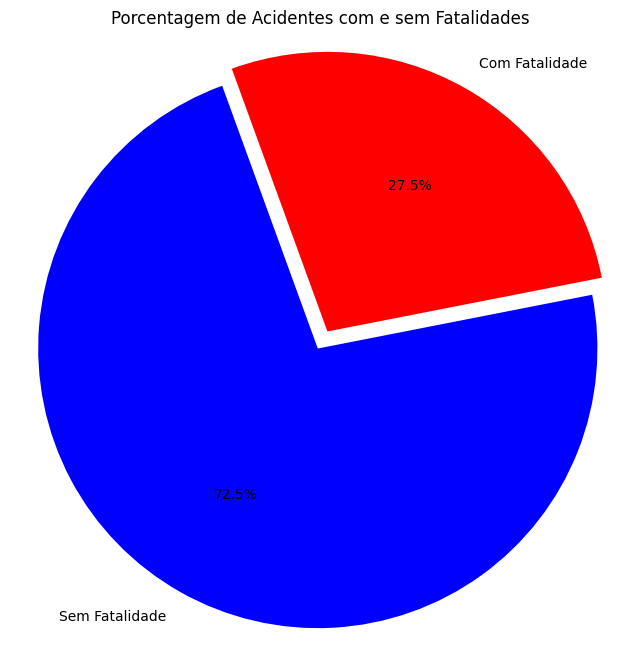

In [7]:
# Porcentagem de acidentes com e sem fatalidades

# Criar nova coluna para classificar acidentes
df['tem_fatalidade'] = df['aeronave_fatalidades_total'].apply(lambda x: 'Com Fatalidade' if x > 0 else 'Sem Fatalidade')

# Contar ocorrências
contagem = df['tem_fatalidade'].value_counts()

# Cores e rótulos
cores = ['blue', 'red']
labels = contagem.index
valores = contagem.values

# Gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(valores, labels=labels, autopct='%1.1f%%', startangle=110, colors=cores, explode=(0.07, 0))
plt.title('Porcentagem de Acidentes com e sem Fatalidades')
plt.axis('equal')  # Mantém o formato de círculo
plt.show()


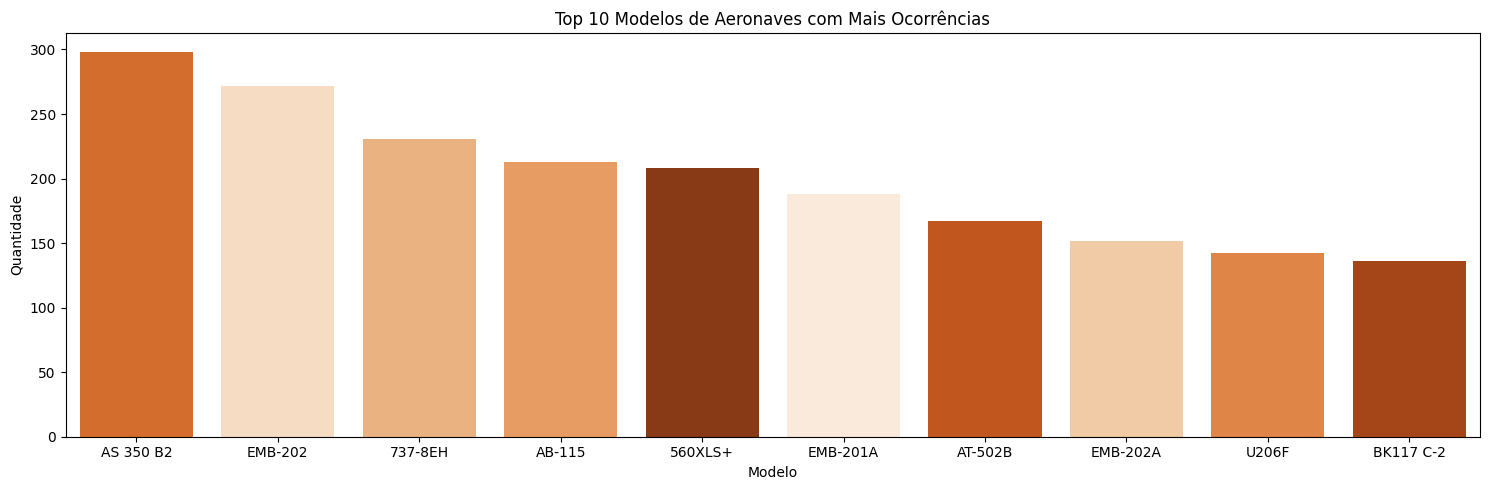

In [ ]:
# TOP 10 modelos de aeronaves com mais ocorrências

plt.figure(figsize=(15, 5))
top_modelos = df['aeronave_modelo'].value_counts().nlargest(10).index
# Gráfico de barras
sns.countplot(
    data=df[df['aeronave_modelo'].isin(top_modelos)],
    x='aeronave_modelo',
    hue='aeronave_modelo',
    order=top_modelos,
    palette='Oranges',
    legend=False
)
plt.title('Top 10 Modelos de Aeronaves com Mais Ocorrências')
plt.xlabel('Modelo')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.tight_layout()

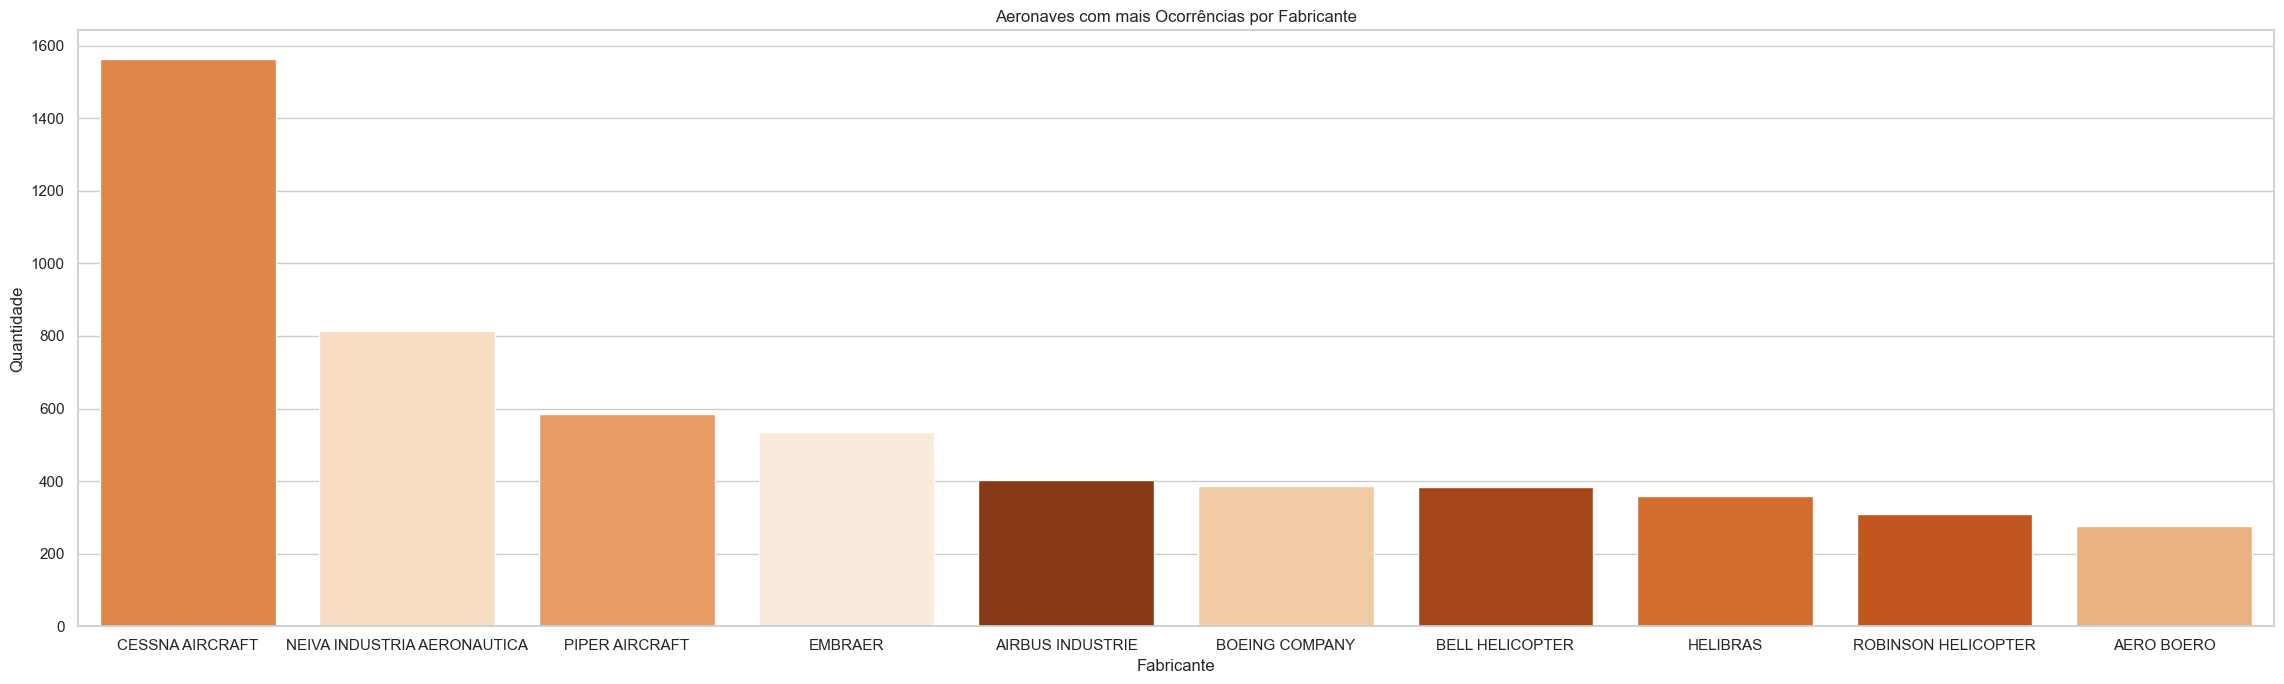

In [ ]:
# Aeronaves com mais ocorrências por fabricante

plt.figure(figsize=(23, 7))
top_fabricantes = df['aeronave_fabricante'].value_counts().nlargest(10).index
# Gráfico de barras
sns.countplot(
    data=df[df['aeronave_fabricante'].isin(top_fabricantes)],
    x='aeronave_fabricante',
    hue='aeronave_fabricante',
    order=top_fabricantes,
    palette='Oranges',
    legend=False
)
plt.title('Aeronaves com mais Ocorrências por Fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

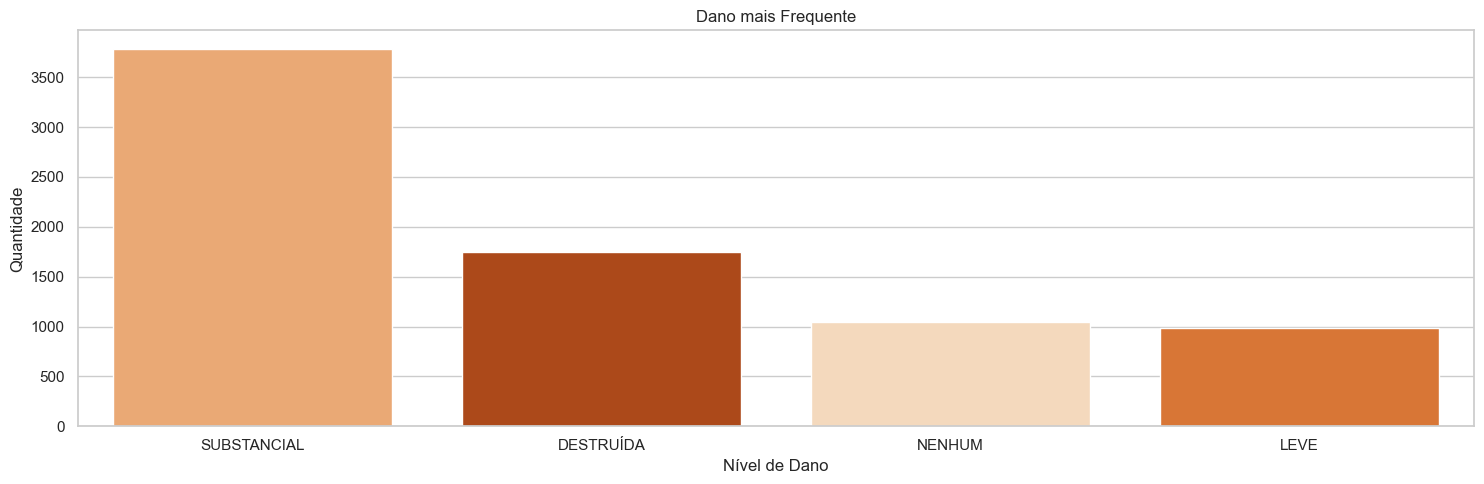

In [ ]:
# Nivel de dano mais frequente

plt.figure(figsize=(15, 5))
top_danos = df['aeronave_nivel_dano'].value_counts().nlargest(5).index
# Gráfico de barras
sns.countplot(
    data=df[df['aeronave_nivel_dano'].isin(top_danos)],
    x='aeronave_nivel_dano',
    hue='aeronave_nivel_dano',
    order=top_danos,
    palette='Oranges',
    legend=False
)
plt.title('Dano mais Frequente')
plt.xlabel('Nível de Dano')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



### 🔍 Classificação das Ocorrências

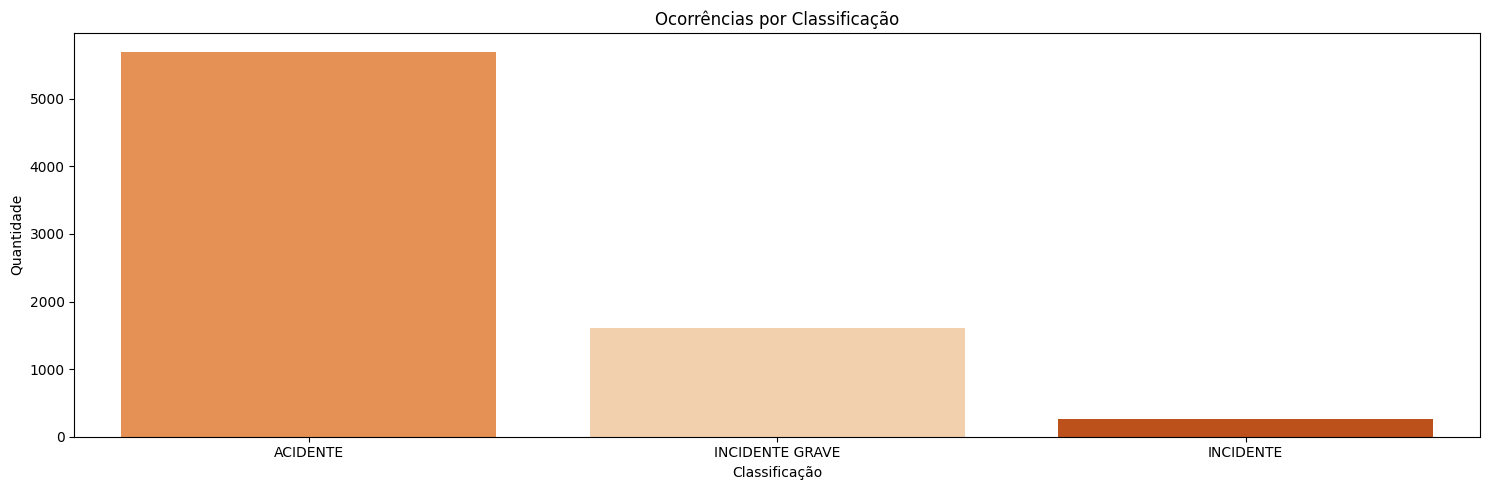

In [15]:
#  Classificação das ocorrências

plt.figure(figsize=(15, 5))
top_classificacao = df['ocorrencia_classificacao'].value_counts().nlargest(3).index
# Gráfico de barras
sns.countplot(
    data=df[df['ocorrencia_classificacao'].isin(top_classificacao)],
    x='ocorrencia_classificacao',
    hue='ocorrencia_classificacao',
    order=top_classificacao,
    palette='Oranges',
    legend=False
)
plt.title('Ocorrências por Classificação')
plt.xlabel('Classificação')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


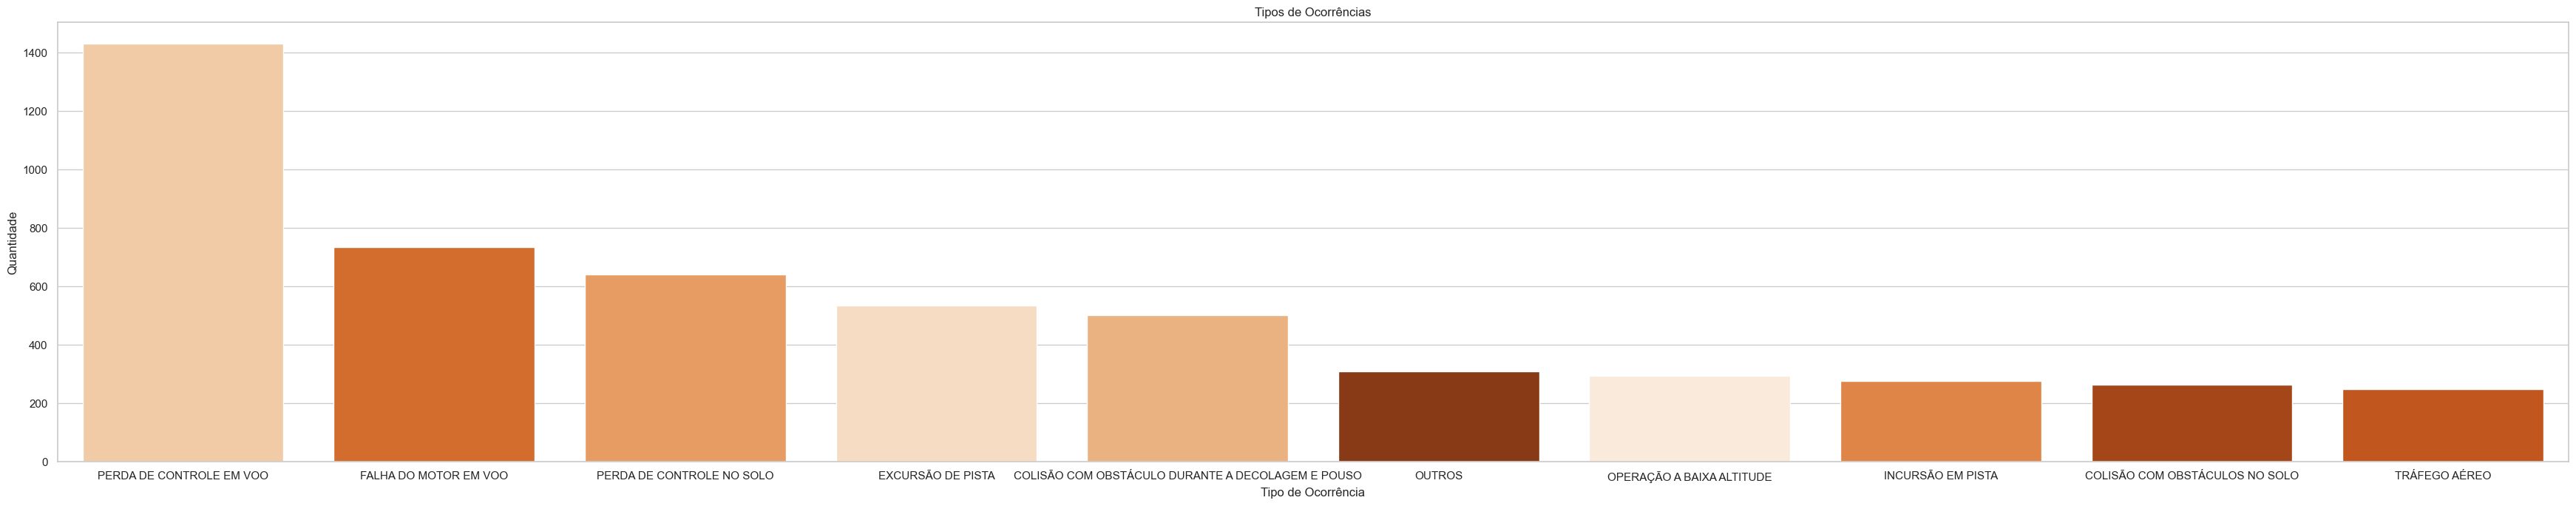

In [ ]:
# Tipos de ocorrências

plt.figure(figsize=(35, 7))
top_tipo = df['ocorrencia_tipo'].value_counts().nlargest(10).index
# Gráfico de barras
sns.countplot(
    data=df[df['ocorrencia_tipo'].isin(top_tipo)],
    x='ocorrencia_tipo',
    hue='ocorrencia_tipo',
    order=top_tipo,
    palette='Oranges',
    legend=False
)
plt.title('Tipos de Ocorrências')
plt.xlabel('Tipo de Ocorrência')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



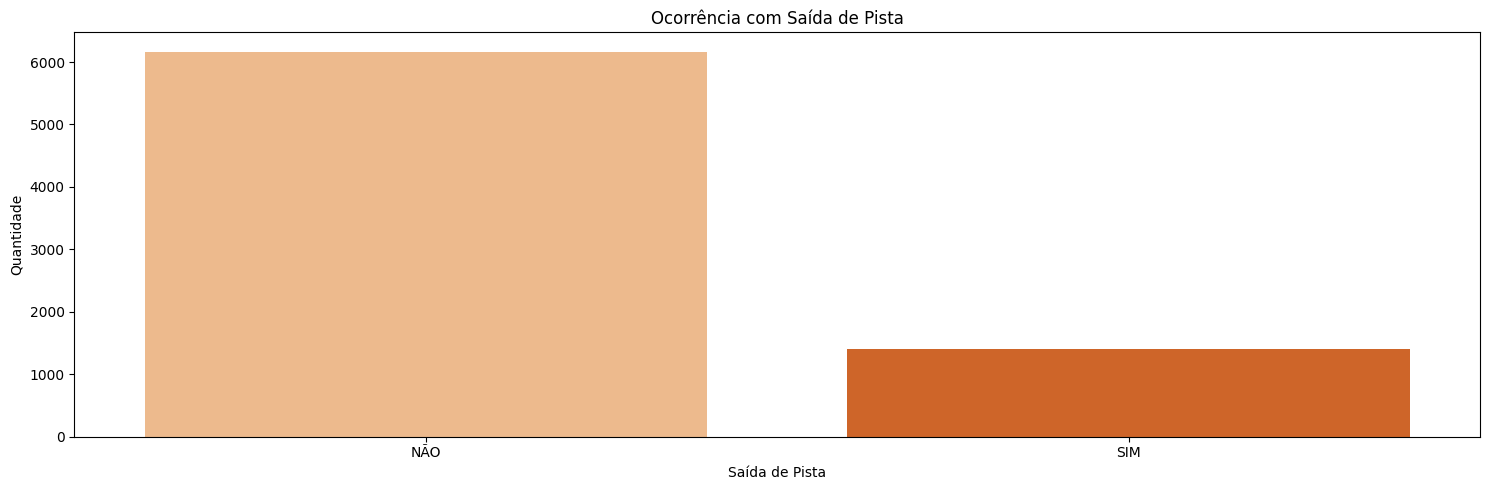

In [ ]:
# Ocorrências com saída de pista

plt.figure(figsize=(15, 5))
top_saida_pista = df['ocorrencia_saida_pista'].value_counts().nlargest(2).index
# Gráfico de barras
sns.countplot(
    data=df[df['ocorrencia_saida_pista'].isin(top_saida_pista)],
    x='ocorrencia_saida_pista',
    hue='ocorrencia_saida_pista',
    order=top_saida_pista,
    palette='Oranges',
    legend=False
)
plt.title('Ocorrência com Saída de Pista')
plt.xlabel('Saída de Pista')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 📄 Recomendações de Segurança

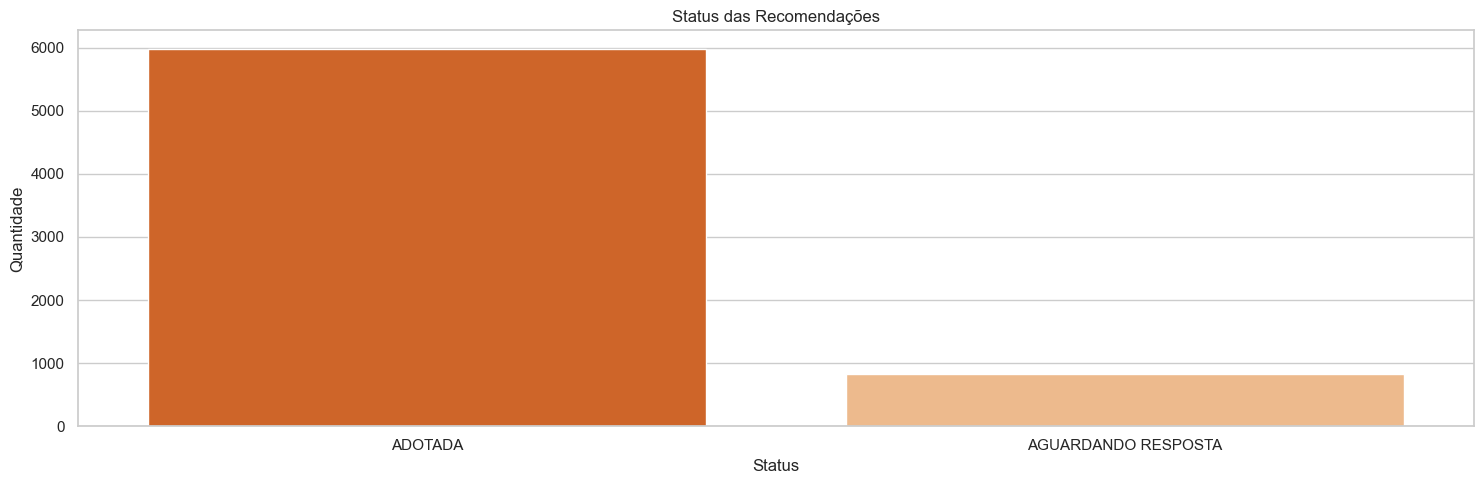

In [ ]:
#Status das recomendações

plt.figure(figsize=(15, 5))
top_recomendacao = df['recomendacao_status'].value_counts().nlargest(2).index
# Gráfico de barras
sns.countplot(
    data=df[df['recomendacao_status'].isin(top_recomendacao)],
    x='recomendacao_status',
    hue='recomendacao_status',
    order=top_recomendacao,
    palette='Oranges',
    legend=False
)
plt.title('Status das Recomendações')
plt.xlabel('Status')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


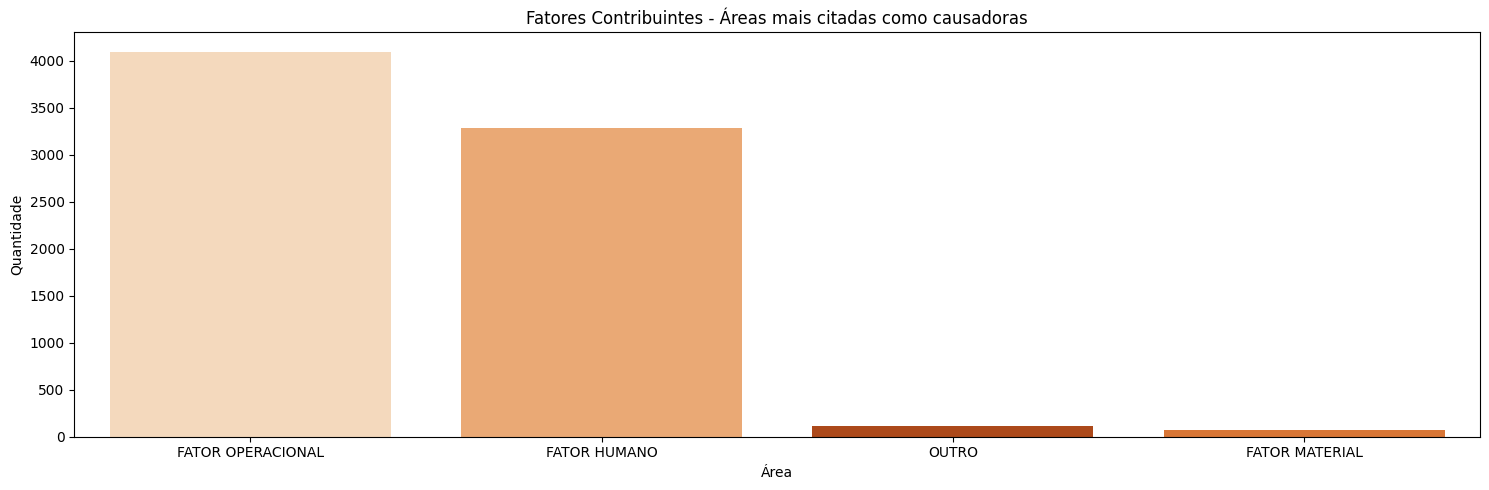

In [ ]:
# Fatores contribuintes - Areas mais citadas como causadoras

plt.figure(figsize=(15, 5))
top_fator_area = df['fator_area'].value_counts().nlargest(10).index
# Gráfico de barras
sns.countplot(
    data=df[df['fator_area'].isin(top_fator_area)],
    x='fator_area',
    hue='fator_area',
    order=top_fator_area,
    palette='Oranges',
    legend=False
)
plt.title('Fatores Contribuintes - Áreas mais citadas como causadoras')
plt.xlabel('Área')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

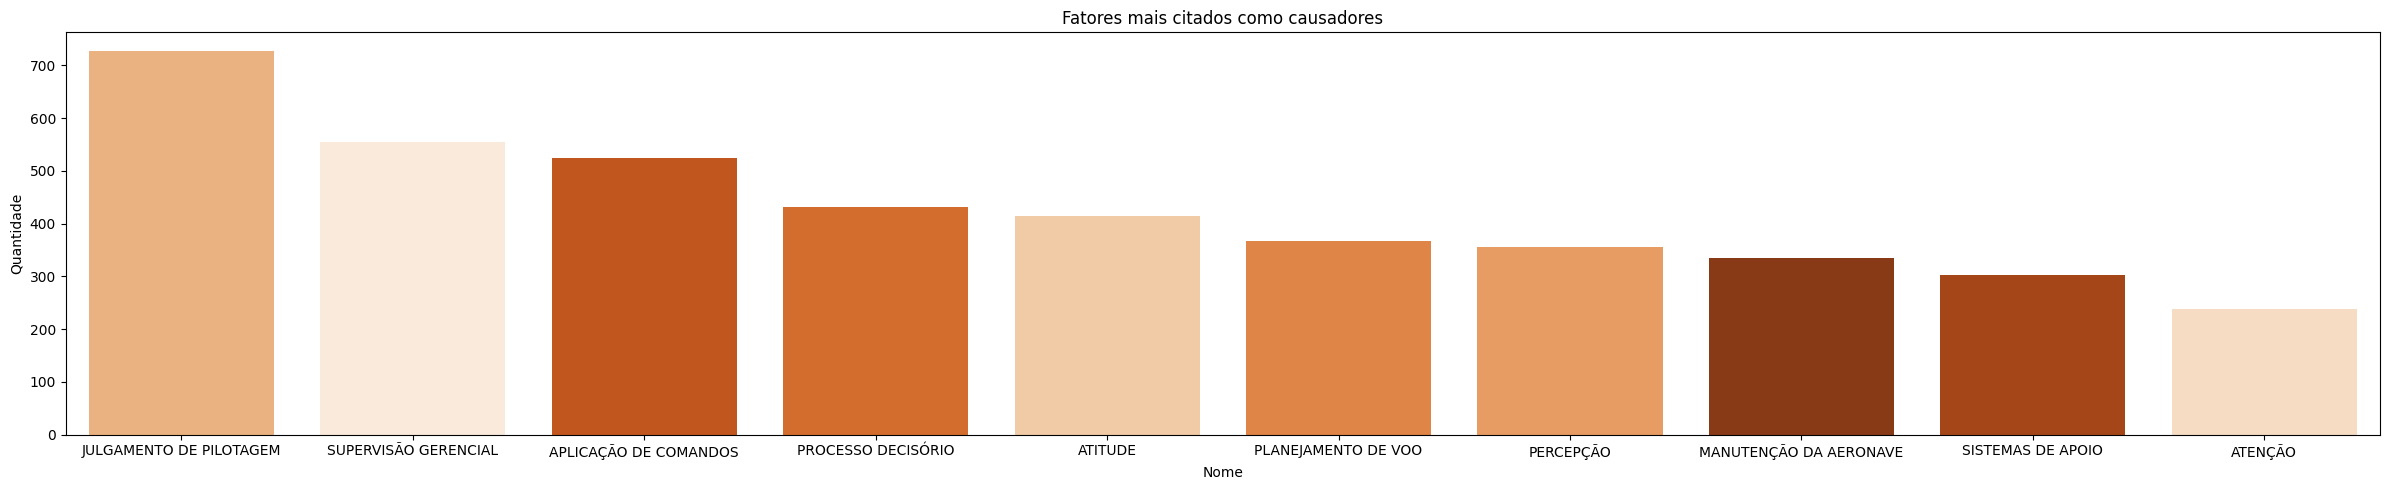

In [ ]:
# Fatores mais citados como causadores

plt.figure(figsize=(24, 5))
top_fator_nome = df['fator_nome'].value_counts().nlargest(10).index
# Gráfico de barras
sns.countplot(
    data=df[df['fator_nome'].isin(top_fator_nome)],
    x='fator_nome',
    hue='fator_nome',
    order=top_fator_nome,
    palette='Oranges',
    legend=False
)
plt.title('Fatores mais citados como causadores')
plt.xlabel('Nome')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()